In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving People_Analytics_Intern_Project_(1).xlsx to People_Analytics_Intern_Project_(1).xlsx


In [3]:
overall = pd.read_excel('People_Analytics_Intern_Project_(1).xlsx')

In [4]:
division = pd.read_excel('People_Analytics_Intern_Project_(1).xlsx', sheet_name = 1)

In [5]:
region = pd.read_excel('People_Analytics_Intern_Project_(1).xlsx', sheet_name = 2)

In [6]:
overall.head()

,Month,Headcount,Total Attrition,Total Turnover Rate,Voluntary & Regretted Attrition,Voluntary & Regretted Rate,Voluntary & Non-Regretted Attrition,Voluntary & Non-Regretted Rate,Involuntary Attrition,Involuntary Rate
0,2018-07-01,472,9,0.019068,6,0.012712,3,0.006356,0,0.000000
1,2018-08-01,474,10,0.021097,5,0.010549,2,0.004219,3,0.006329
2,2018-09-01,480,9,0.018750,3,0.006250,5,0.010417,1,0.002083
3,2018-10-01,492,9,0.018293,1,0.002033,5,0.010163,2,0.004065
4,2018-11-01,502,9,0.017928,2,0.003984,7,0.013944,0,0.000000


Overall Trends

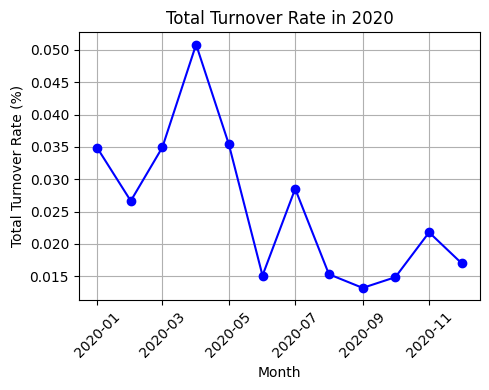

In [7]:
overall['Month'] = pd.to_datetime(overall['Month'])
twenty = overall[18:30]

plt.figure(figsize=(5, 4))
plt.plot(twenty['Month'], twenty['Total Turnover Rate'], marker='o', color='b')

plt.title('Total Turnover Rate in 2020')
plt.xlabel('Month')
plt.ylabel('Total Turnover Rate (%)')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

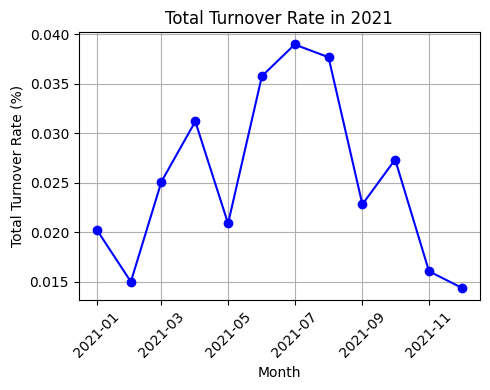

In [8]:
twenty_one = overall[30:42]

plt.figure(figsize=(5, 4))
plt.plot(twenty_one['Month'], twenty_one['Total Turnover Rate'], marker='o', color='b')

plt.title('Total Turnover Rate in 2021')
plt.xlabel('Month')
plt.ylabel('Total Turnover Rate (%)')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

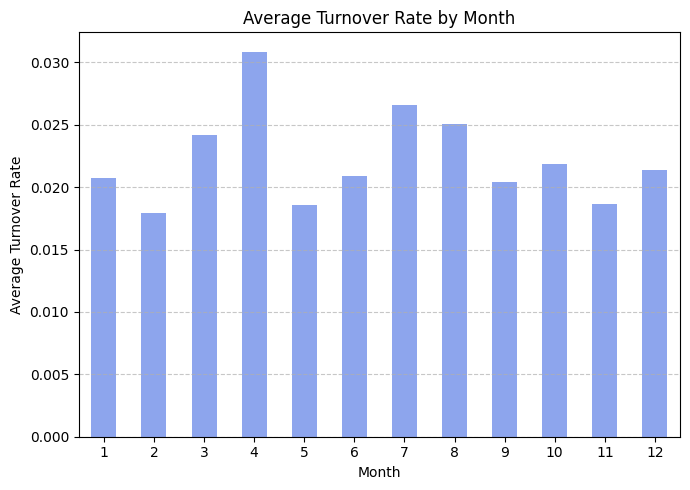

In [9]:
overall['M'] = overall['Month'].dt.month
monthly_avg_turnover = overall.groupby('M')['Total Turnover Rate'].mean()

plt.figure(figsize=(7, 5))
monthly_avg_turnover.plot(kind='bar', color='royalblue', alpha = 0.6)
plt.title('Average Turnover Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Turnover Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Turnover Impact')

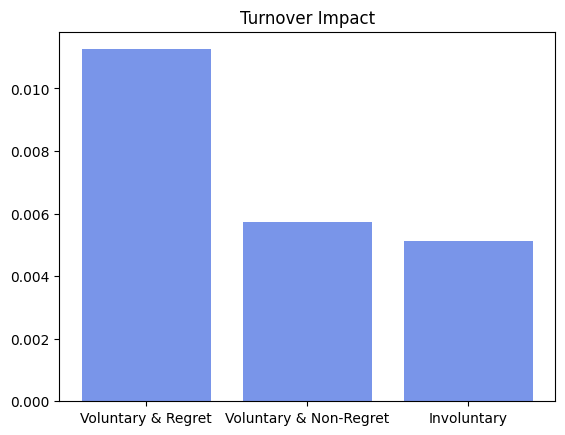

In [10]:
categories = ["Voluntary & Regret", "Voluntary & Non-Regret", "Involuntary"]
counts = [overall['Voluntary & Regretted Rate'].mean(), overall['Voluntary & Non-Regretted Rate'].mean(), overall['Involuntary Rate'].mean()]
plt.bar(categories, counts, color='royalblue', alpha = 0.7)
plt.title('Turnover Impact')

Analysis of Department Turnover Rates

In [11]:
d1 = division[division['Division'] == "Global General & Administrative"]
d2 = division[division['Division'] == "Global Sales & Marketing"]
d3 = division[division['Division'] == "Global Research & Development"]

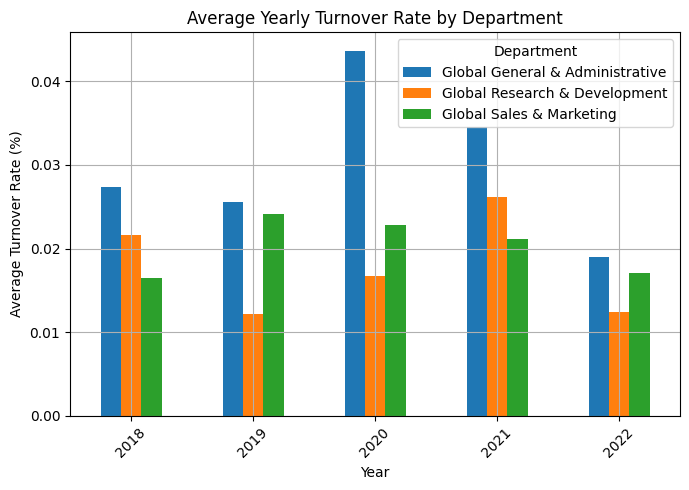

In [15]:
division['Year'] = division['Month'].dt.year
yearly_turnover = division.groupby(['Year', 'Division'])['Total Turnover Rate'].mean().reset_index()

pivot_data = yearly_turnover.pivot(index = 'Year', columns = 'Division', values = 'Total Turnover Rate')

pivot_data.plot(kind='bar', figsize=(7, 5))
plt.title('Average Yearly Turnover Rate by Department')
plt.xlabel('Year')
plt.ylabel('Average Turnover Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis of Regional Turnover Rates

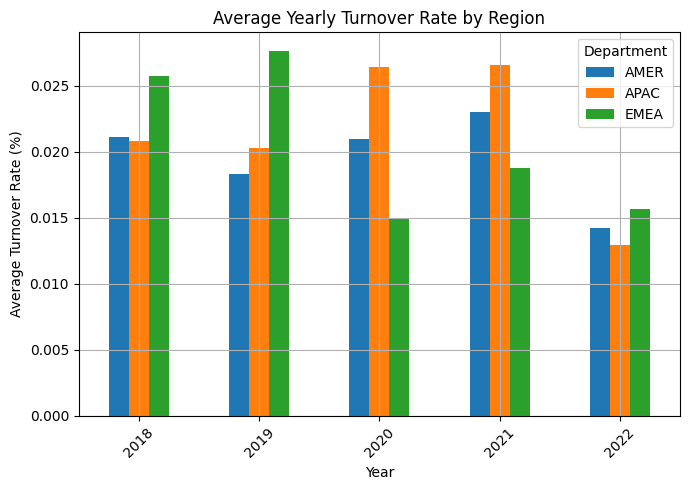

In [13]:
region['Year'] = region['Month'].dt.year
yearly_turnover = region.groupby(['Year', 'Region'])['Total Turnover Rate'].mean().reset_index()

pivot_data = yearly_turnover.pivot(index = 'Year', columns = 'Region', values = 'Total Turnover Rate')

pivot_data.plot(kind='bar', figsize=(7, 5))
plt.title('Average Yearly Turnover Rate by Region')
plt.xlabel('Year')
plt.ylabel('Average Turnover Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.grid(True)
plt.tight_layout()
plt.show()